In [1]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import plotly.graph_objs as go
import plotly.offline as py
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import math


from sklearn import ensemble, linear_model, clone
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
from sklearn.utils import shuffle
train = shuffle(train)

In [4]:
train.shape

(200000, 18)

In [5]:
train.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [6]:
train.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,80.449760,80.491200,25.504240,13.939880,13.935520,17.348480,17.379280,4.999550,2.452715,2.45097,0.499680,0.499865,0.49906,0.499925,217.998110,217.928765,217.883455,217.880732
std,42.481567,42.457207,7.857326,7.878135,7.876161,9.379925,9.384725,3.000007,1.957956,1.95554,0.500001,0.500001,0.50000,0.500001,369.398349,369.070383,369.058931,369.081649
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,40.690000,40.750000,40.690000,40.680000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.00000,0.000000,69.900000,70.000000,69.870000,69.900000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.00000,1.000000,1.000000,1.00000,1.000000,228.910000,228.580000,228.602500,228.570000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.00000,1.000000,1.000000,1.00000,1.000000,3333.920000,3375.420000,3397.080000,3360.520000


In [7]:
test.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
count,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000,41601.000000
mean,80.356914,80.751136,25.488618,13.856975,13.987933,17.280738,17.355160,4.960121,2.468643,2.467176,0.497055,0.497752,0.498954,0.498401
std,42.550625,42.396031,7.860375,7.842955,7.893080,9.367520,9.373061,2.999771,1.964843,1.973328,0.499997,0.500001,0.500005,0.500003
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000


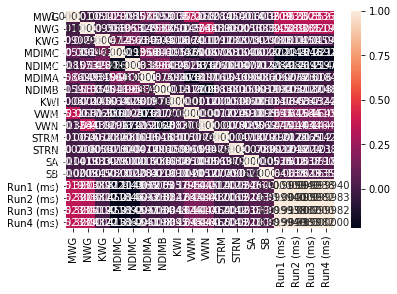

In [8]:
corrmat=train.corr()
fig=plt.figure()

sns.heatmap(corrmat,annot=True,fmt='f')
plt.show()

In [9]:
col=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB']
target=['Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)']

In [ ]:
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

lr = SVR()
#lr = linear_model.LinearRegression()
#boston = train[col].load_boston()
y = train_set['Run1 (ms)']

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_set[col], y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

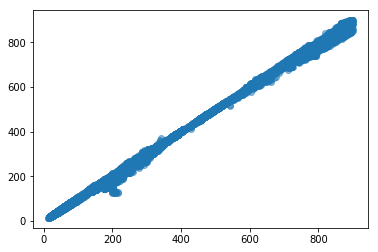

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)



x = train['Run1 (ms)']
y = train['Run2 (ms)']

area = (30 * np.random.rand(10))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=.5)
plt.show()

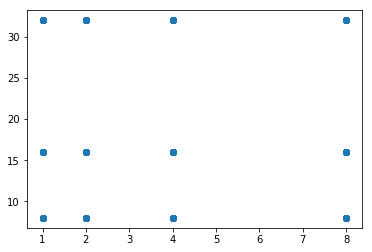

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)



x = train['VWM']
y = train['NDIMC']

area = (30 * np.random.rand(10))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=.5)
plt.show()

In [9]:
train[col].describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000
mean,80.449760,80.491200,25.504240,13.939880,13.935520,17.348480,17.379280,4.999550,2.452715,2.45097,0.499680,0.499865,0.49906,0.499925
std,42.481567,42.457207,7.857326,7.878135,7.876161,9.379925,9.384725,3.000007,1.957956,1.95554,0.500001,0.500001,0.50000,0.500001
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.00000,0.000000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.00000,1.000000,1.000000,1.00000,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.00000,1.000000,1.000000,1.00000,1.000000


In [128]:
train.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [10]:
from sklearn.model_selection import train_test_split
#training set
train_set=train.sample(frac=0.8,random_state=1)
#test set
test_set=train.loc[~train.index.isin(train_set.index)]
print(train_set.shape)
print(test_set.shape)

(160000, 18)
(40000, 18)


In [11]:
from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsClassifier(n_neighbors=3)
regr1 = KNeighborsRegressor(n_neighbors=3)
regr1.fit(train_set[col],train_set['Run1 (ms)'])
predictions1 = regr1.predict(test_set[col])

regr2 = KNeighborsRegressor(n_neighbors=3)
regr2.fit(train_set[col],train_set['Run2 (ms)'])
predictions2 = regr2.predict(test_set[col])

regr3 = KNeighborsRegressor(n_neighbors=3)
regr3.fit(train_set[col],train_set['Run3 (ms)'])
predictions3 = regr3.predict(test_set[col])

regr4 = KNeighborsRegressor(n_neighbors=3)
regr4.fit(train_set[col],train_set['Run4 (ms)'])
predictions4 = regr4.predict(test_set[col])

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr1 = RandomForestRegressor(n_estimators=20)
regr1.fit(train_set[col],train_set['Run1 (ms)'])
predictions1 = regr1.predict(test_set[col])

regr2 = RandomForestRegressor(n_estimators=20)
regr2.fit(train_set[col],train_set['Run2 (ms)'])
predictions2 = regr2.predict(test_set[col])

regr3 = RandomForestRegressor(n_estimators=20)
regr3.fit(train_set[col],train_set['Run3 (ms)'])
predictions3 = regr3.predict(test_set[col])

regr4 = RandomForestRegressor(n_estimators=20)
regr4.fit(train_set[col],train_set['Run4 (ms)'])
predictions4 = regr4.predict(test_set[col])


In [45]:
from sklearn.tree import DecisionTreeRegressor
#boston = load_boston()
#regressor = DecisionTreeRegressor(random_state=0)
regr1 = DecisionTreeRegressor()
regr1.fit(train_set[col],train_set['Run1 (ms)'])
predictions1 = regr1.predict(test_set[col])

In [46]:
regr2 = DecisionTreeRegressor()
regr2.fit(train_set[col],train_set['Run2 (ms)'])
predictions2 = regr2.predict(test_set[col])

In [47]:
regr3 = DecisionTreeRegressor()
regr3.fit(train_set[col],train_set['Run3 (ms)'])
predictions3 = regr3.predict(test_set[col])

In [48]:
regr4 = DecisionTreeRegressor()
regr4.fit(train_set[col],train_set['Run4 (ms)'])
predictions4 = regr4.predict(test_set[col])

In [ ]:
regr1 = RandomForestRegressor(n_estimators=500,random_state=4)
regr1.fit(train[col],train['Run1 (ms)'])
predictions1 = regr1.predict(test[col])

regr2 = RandomForestRegressor(n_estimators=500,random_state=4)
regr2.fit(train[col],train['Run2 (ms)'])
predictions2 = regr2.predict(test[col])

regr3 = RandomForestRegressor(n_estimators=500,random_state=4)
regr3.fit(train[col],train['Run3 (ms)'])
predictions3 = regr3.predict(test[col])

regr4 = RandomForestRegressor(n_estimators=500,random_state=4)
regr4.fit(train[col],train['Run4 (ms)'])
predictions4 = regr4.predict(test[col])

In [ ]:
l1 = []
for item in predictions1:
    l1.append(item)
l2 = []
for item in predictions2:
    l2.append(item)
l3 = []
for item in predictions3:
    l3.append(item)
l4 = []
for item in predictions4:
    l4.append(item)

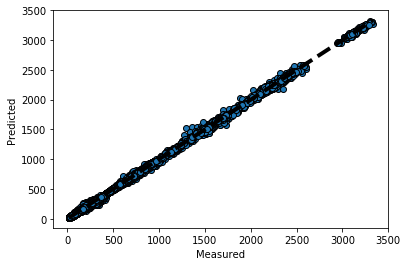

In [14]:
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

lr =  RandomForestRegressor(n_estimators=100,random_state=4)
#lr = linear_model.LinearRegression()
#boston = train[col].load_boston()
y = train_set['Run1 (ms)']

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_set[col], y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

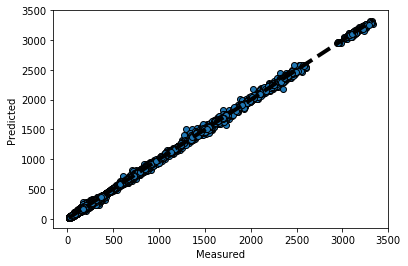

In [17]:
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

lr =  RandomForestRegressor(n_estimators=50,random_state=8)
#lr = linear_model.LinearRegression()
#boston = train[col].load_boston()
y = train_set['Run1 (ms)']

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_set[col], y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [26]:
print(l1)

[287.61879999999996, 148.97460000000004, 107.80269999999986, 240.79270000000045, 151.4624999999998, 222.66140000000013, 265.2754, 150.84559999999993, 277.19909999999976, 286.04539999999974, 291.1091000000003, 289.9465000000002, 154.0522, 284.57809999999984, 292.9108999999998, 247.6205999999998, 137.26540000000014, 287.04609999999974, 135.68350000000007, 243.08529999999956, 178.71110000000007, 137.59980000000007, 325.69239999999985, 346.0575, 348.18979999999954, 145.35450000000003, 291.0951999999997, 317.7280999999997, 307.7339000000001, 390.05770000000047, 354.5423000000003, 145.11349999999982, 399.30440000000016, 295.12809999999973, 156.41339999999997, 322.5237999999999, 360.31559999999996, 164.60569999999993, 284.26839999999964, 299.6631000000001, 279.66549999999995, 277.5432000000001, 290.1301000000002, 377.68409999999994, 153.1702, 134.37379999999993, 369.8655000000001, 231.95719999999974, 120.87539999999994, 113.4755, 284.56969999999995, 242.32970000000034, 235.97660000000005, 223

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(l1,test_set['Run1 (ms)'])

9717.45924785

In [20]:
my_submission = pd.DataFrame({'Id': test.Id, 'Run1 (ms)': l1, 'Run2 (ms)': l2, 'Run3 (ms)': l3, 'Run4 (ms)': l4})

my_submission.to_csv('submission3.csv', index=False)